In [2]:
pip install pandas numpy seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp314-cp314-win_amd64.whl.metadata (115 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl (12.9 MB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -- --------------------

Data loading

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/final_training_data_all_regions.csv')
df['time'] = pd.to_datetime(df['time'])

df = df.sort_values(by=['region', 'time'])

df['hour_sin'] = np.sin(2 * np.pi * df['time'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['time'].dt.hour / 24)
df['month_sin'] = np.sin(2 * np.pi * df['time'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['time'].dt.month / 12)

wd_rad = df['wind_direction_10m (°)'] * np.pi / 180
df['wd_sin'] = np.sin(wd_rad)
df['wd_cos'] = np.cos(wd_rad)

df_encoded = pd.get_dummies(df, columns=['region'], prefix='city')

df_encoded.head()

,time,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),wind_direction_10m (°),precipitation (mm),pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),nitrogen_dioxide (μg/m³),...,month_sin,month_cos,wd_sin,wd_cos,city_doha,city_khor,city_qatar,city_rayyan,city_ummsalal,city_wakrah
0,2023-01-01 00:00:00,16.7,73,18.9,318,0.0,52.6,27.9,195.0,31.1,...,0.5,0.866025,-0.669131,0.743145,True,False,False,False,False,False
1,2023-01-01 01:00:00,16.6,76,19.3,327,0.0,52.2,27.6,192.0,29.4,...,0.5,0.866025,-0.544639,0.838671,True,False,False,False,False,False
2,2023-01-01 02:00:00,16.7,75,20.0,332,0.0,52.2,27.5,187.0,27.0,...,0.5,0.866025,-0.469472,0.882948,True,False,False,False,False,False
3,2023-01-01 03:00:00,16.6,74,18.5,327,0.0,51.6,27.3,184.0,25.4,...,0.5,0.866025,-0.544639,0.838671,True,False,False,False,False,False
4,2023-01-01 04:00:00,17.3,72,19.6,328,0.0,51.9,27.9,187.0,27.5,...,0.5,0.866025,-0.529919,0.848048,True,False,False,False,False,False


Correlation Heatmap

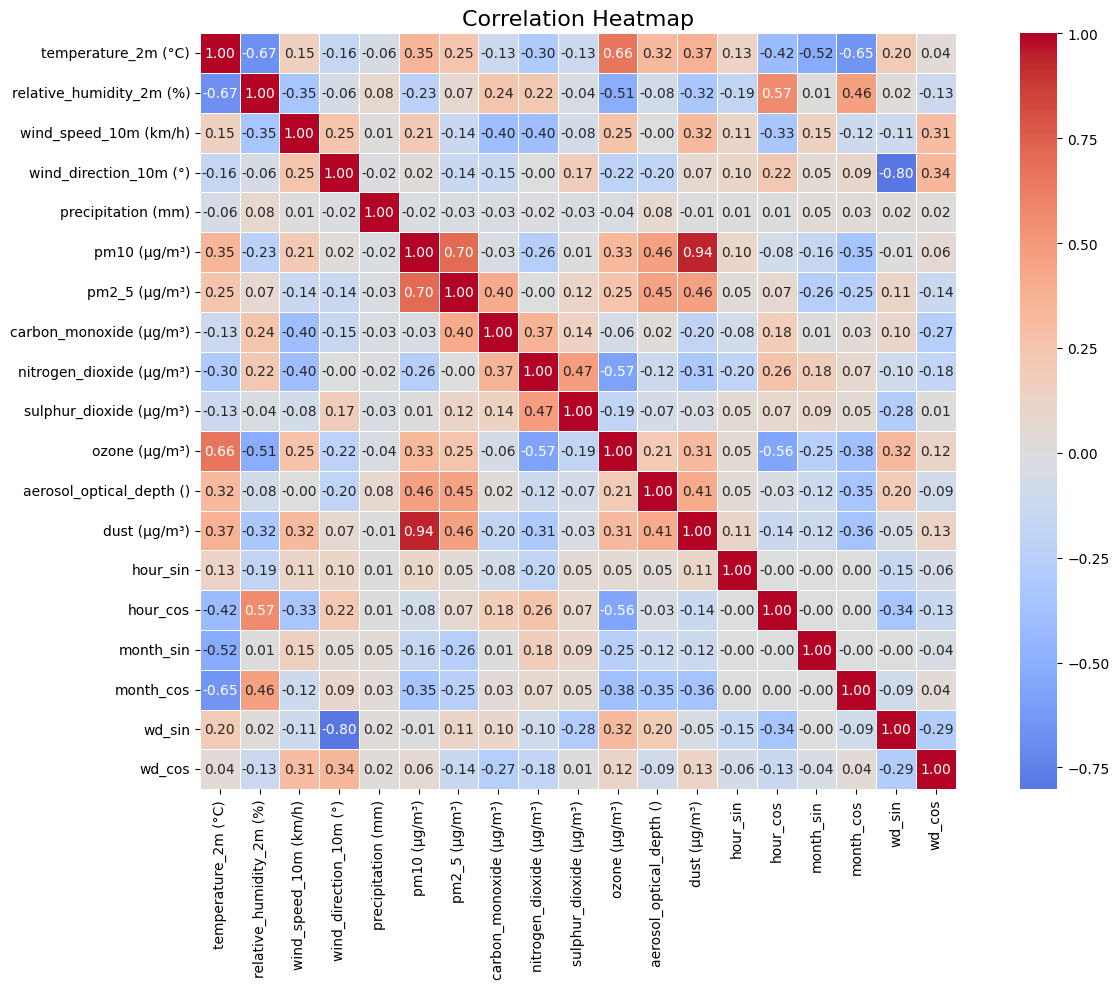

In [13]:
corr_matrix = df_encoded.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

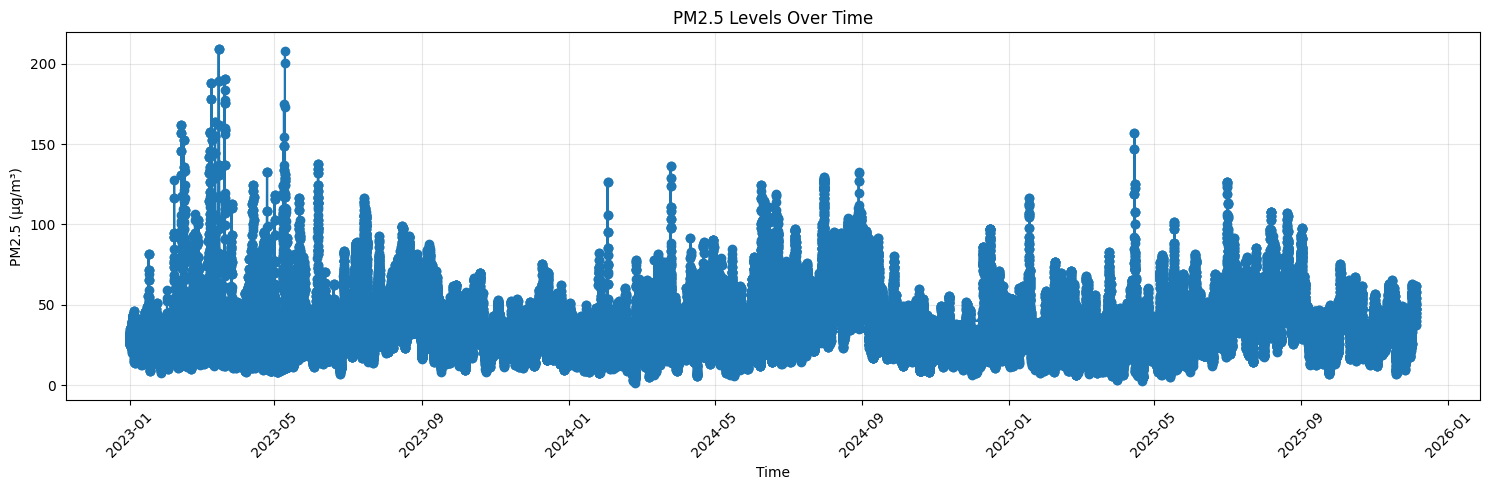

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['time'], df['pm2_5 (μg/m³)'])
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()